In [2]:
#install pyspark
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 45.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=fb715a58d97af9a4f91bed20daccd958bd138cb79315685086a06097c3bb633d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [3]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [4]:
from pyspark.sql import functions as f
from pyspark.sql.functions import udf,col

##Write PySpark code to read the olympix_data.csv file


In [5]:
#read the dataset using spark and store it in a dataframe
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")
df.show() #print output
df.count() # count of records
len(df.columns) # columns

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

10

There are 8618 rows and 10 columns in the dataframe.

In [6]:
df1= df.na.drop(how = "any") # Dropping the NULL Values .
df1.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [7]:
#check the Records inthe Dataframe After dropping the Null Values.
df1.count()

8613

After  dropping the Null Values we got 8613 records.

In [8]:
df1.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



Here we can see that "Date_Given" attribute is read as "String".So,need to convert that into "Date datatype".

In [9]:
#Convert the Date_Given attribute from String datatype to Date datatype 
modifiedDF = df1.withColumn("Date_Given",f.to_date(df.Date_Given,"mm/dd/yyyy"))
modifiedDF.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: date (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



Everything is Perfect now.."Date_Given" is reading as "Date datatype".

##Write PySpark code to print the Olympic Sports/games in the dataset.


In [10]:
df2 = modifiedDF.select("sports").distinct() # selecting the sports columns.
df2.show()
df2.count()

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



49

Here we can see that there are 49 sports. 

##Write PySpark code to plot the total number of medals in  each Olympic Sport/game


In [11]:
res1 = modifiedDF.groupBy("sports").agg({"total_medal" :"sum"}) 
res1 = res1.withColumnRenamed("sum(total_medal)","Total_medals").show()


+--------------------+------------+
|              sports|Total_medals|
+--------------------+------------+
|          Gymnastics|         282|
|              Tennis|          78|
|              Boxing|         188|
|Short-Track Speed...|         138|
|          Ice Hockey|         384|
|              Rowing|         576|
|                Judo|         224|
|            Softball|         134|
|             Sailing|         210|
|            Swimming|         765|
|       Alpine Skiing|          90|
|          Basketball|         287|
|            Handball|         351|
| Rhythmic Gymnastics|          84|
|            Biathlon|         138|
|           Triathlon|          24|
|           Badminton|          96|
|           Athletics|         753|
|      Figure Skating|          54|
|    Beach Volleyball|          48|
+--------------------+------------+
only showing top 20 rows



In the above code we can see that, we are doing groupby to the "sports" data and using the aggregate function "SUM" to the "total_medal" attribute.And Renaming the column as "Total_medals".

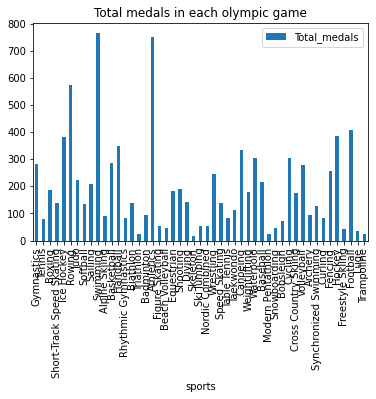

In [12]:
import matplotlib.pyplot as plt 
res1 = modifiedDF.groupBy("sports").agg({"total_medal" :"sum"})
res1 = res1.withColumnRenamed("sum(total_medal)","Total_medals")
pandas_df = res1.toPandas()  #converting into  Pandas Dataframe
pandas_df.plot.bar(x = "sports", y = "Total_medals", title = "Total medals in each olympic game") # creating a barplot.



Now, we are doing data visualization , first we need to convert the "res" dataframe into "toPandas" dataframe.Then creating a bar plot by giving "x" and "y" values and a Title for the plot.

##Sort the result based on the total number of medals.

In [14]:
res1.orderBy(f.desc("Total_medals")).show() # using orderby function sorting the Total_medals in descending order.

+----------+------------+
|    sports|Total_medals|
+----------+------------+
|  Swimming|         765|
| Athletics|         753|
|    Rowing|         576|
|  Football|         407|
|    Hockey|         386|
|Ice Hockey|         384|
|  Handball|         351|
|  Canoeing|         333|
| Waterpolo|         306|
|   Cycling|         306|
|Basketball|         287|
|Gymnastics|         282|
|Volleyball|         278|
|   Fencing|         256|
| Wrestling|         245|
|      Judo|         224|
|  Baseball|         216|
|   Sailing|         210|
|  Shooting|         192|
|    Boxing|         188|
+----------+------------+
only showing top 20 rows



##Find the total number of medals won by each country in swimming.


In [15]:
res=modifiedDF.select("total_medal","sports","country").where(modifiedDF.sports=="Swimming")
res.groupby("country").sum("total_medal").show()


+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|              20|
|       Sweden|               9|
|      Germany|              32|
|       France|              39|
|     Slovakia|               2|
|    Argentina|               1|
|Great Britain|              11|
|United States|             267|
|        China|              35|
|      Belarus|               2|
|      Croatia|               1|
|        Italy|              16|
|    Lithuania|               1|
|       Norway|               2|
|        Spain|               3|
|      Denmark|               1|
|      Ukraine|               7|
|  South Korea|               4|
|     Zimbabwe|               7|
|      Tunisia|               3|
+-------------+----------------+
only showing top 20 rows



##Find the total number of medals won by each country in Skeleton.


In [16]:
res=modifiedDF.select("total_medal","country","sports").where(modifiedDF.sports=="Skeleton")
res.groupby("country").sum("total_medal").show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|               1|
|      Germany|               2|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|       Latvia|               1|
|       Canada|               4|
|      Austria|               1|
+-------------+----------------+



##Find the number of medals that the US won yearly.


In [17]:
res3=modifiedDF.select("total_medal","year","country").where(modifiedDF.country=="United States")
res3.groupby("year").sum("total_medal").show()


+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



##Find the total number of medals won by each country.


In [18]:
res4=modifiedDF.groupBy("country").agg({"total_medal":"sum"})
res4 = res4.withColumnRenamed("sum(total_medal)","Total_medals").show()

+--------------+------------+
|       country|Total_medals|
+--------------+------------+
|        Russia|         768|
|      Paraguay|          17|
|Chinese Taipei|          20|
|        Sweden|         181|
|       Eritrea|           1|
|     Singapore|           7|
|      Malaysia|           3|
|        Turkey|          28|
|       Germany|         629|
|   Afghanistan|           2|
|         Sudan|           1|
|        France|         318|
|        Greece|          59|
|     Sri Lanka|           1|
|       Algeria|           8|
|          Togo|           1|
|      Slovakia|          35|
|     Argentina|         139|
|       Belgium|          18|
| Great Britain|         322|
+--------------+------------+
only showing top 20 rows



##Who was the oldest athlete in the olympics? 


In [19]:
modifiedDF.agg({"age" :"max"}),modifiedDF.where(modifiedDF.age == "61").select("name","age").show()



+----------+---+
|      name|age|
+----------+---+
|Ian Millar| 61|
+----------+---+



(DataFrame[max(age): int], None)

Ian Miller is the oldest athlete,his age is 61.

##Which country was he/she from? 


In [20]:
#selecting the name ,age and country and giving age = 61.
modifiedDF.where(modifiedDF.age == "61").select("name","age","country").show()  # using Where function and selecting the columns like name,age and country.

+----------+---+-------+
|      name|age|country|
+----------+---+-------+
|Ian Millar| 61| Canada|
+----------+---+-------+



Ian Millar was from canada.